In [1]:
import pandas as pd
import os
from datetime import datetime

In [2]:
def calculate_values(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    place_values=[[0.25,-0.1,0],[0.25,0.1,0],[0.5,-0.1,0],[0.5,0.1,0],[0.25,-0.1,-0.1],[0.25,0.1,-0.1],[0.5,-0.1,-0.1],[0.5,0.1,-0.1]]

    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
        else:
            results.append([
                subject,
                order,
                row_count,
                method,
                place_value,
                float(data[i][0])
                ])
            row_count+=1
    return results
            
    
    
    

In [3]:
def calculate_values_averages(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    time_sum= 0
    tmp_rows = 0
    
    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
           
            if tmp_rows > 0:
                # 平均値を計算して結果リストに追加
                results.append([
                     subject,
                    order,
                    row_count,
                    method,
                    place_value,
                    abs(time_sum / tmp_rows),
                   
                ])
                row_count+=1
            # 次のブロックのために変数をリセット
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
            time_sum= 0
            tmp_rows = 0
        else:
             # 各列の値を加算
            time_sum += float(data[i][0])
            tmp_rows += 1
    # 最後のブロックの平均値を計算して追加（ファイルの最後に count: がない場合）
    if tmp_rows > 0:
        results.append([
            subject,
            order,
            row_count,
            method,
            place_value,
            abs(time_sum / tmp_rows),  
        ])
      
    return results
            
    
    
    

In [4]:
import numpy as np

def calculate_values_median(df, subject, method, order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results = []
    place_value = 0
    row_count = 0
 
    values1= []

    for i in range(len(data)):
        if isinstance(data[i][0], str) and data[i][0].startswith("place index:"):
            if values1:
                # 中央値を計算して結果リストに追加
                results.append([
                    subject,
                    order,
                    row_count,
                    method,
                    place_value,
                    abs(np.median(values1) ),
                   
                ])
                row_count += 1
            # 次のブロックのために変数をリセット
            place_text, place_value = data[i][0].split(":")
            place_value = int(place_value)
            row_count = 0
            values1 = []
        else:
            # 各列の値をリストに追加
            values1.append(float(data[i][0]))
            row_count += 1

    # 最後のブロックの中央値を計算して追加（ファイルの最後に count: がない場合）
    if values1:
        results.append([
            subject,
            order,
            row_count,
            method,
            place_value,
            abs(np.median(values1) )
        ])

    return results


In [5]:
# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [6]:
import pathlib
import datetime
# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name,sorted_indices):
    for i, file_path in enumerate(files_paths):
            method=i-1
          
            order=sorted_indices.index(i-1)
            df = read_txt_to_dataframe(file_path)
            # all_results.extend(calculate_values_averages(df,subject_name, method,order))
            # all_results.extend(calculate_values(df,subject_name, method,order))
            
            all_results.extend(calculate_values_median(df,subject_name, method,order))

In [7]:

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [8]:

subject_names=["朴さん","水上","佐々木","万くん","竹村君","平岡拓海","吉村厚紀","岡本","菊池たくま"]
# subject_names=["ほういしん"]

for i in range(len(subject_names)):
        # root_path = r"C:\Users\takaharayota\Research\Exp1-data\{}\times".format(subject_names[i])
        # files_paths = [
        #         root_path + r"\音無し.txt",
        
        # root_path + r"\離散指数.txt",
        # root_path + r"\連続指数.txt",
        # root_path + r"\連続線形.txt",
        #         root_path + r"\離散線形.txt",
        
        # ]
        root_path=r"/Users/takaharayouta/Documents/Research/Exp1-data/{}/times".format(subject_names[i])
  
        files_paths = [
                root_path + r"/音無し.txt",
        
        root_path + r"/離散指数.txt",
        root_path + r"/連続指数.txt",
        root_path + r"/連続線形.txt",
                root_path + r"/離散線形.txt",
        
        ]
        # ファイル名と元のインデックスのタプルのリストを作成
        indexed_files = list(enumerate(files_paths))
        # 作成日時順に並べ替える
        sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # 並べ替え後のインデックスを抽出
        sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i],sorted_indices)


    
print(all_results)  



# 統合されたデータをデータフレームに変換
columns = ['Subject','Order','Count','Method', 'Place', 'Time']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output-time.txt', sep='\t', index=False)

print("DataFrameの内容がoutput-ave.txtに出力されました。")


[['朴さん', 4, 5, -1, 0, 3.77467346191406], ['朴さん', 4, 5, -1, 1, 2.89797973632813], ['朴さん', 4, 5, -1, 2, 3.5540771484375], ['朴さん', 4, 5, -1, 3, 2.72088623046875], ['朴さん', 0, 5, 0, 3, 16.0004844665527], ['朴さん', 0, 5, 0, 1, 13.7080841064453], ['朴さん', 0, 5, 0, 2, 17.5399780273438], ['朴さん', 0, 5, 0, 0, 10.4111328125], ['朴さん', 2, 5, 1, 0, 12.642936706543], ['朴さん', 2, 5, 1, 2, 24.3031158447266], ['朴さん', 2, 5, 1, 1, 14.4319763183594], ['朴さん', 2, 5, 1, 3, 18.3785400390625], ['朴さん', 1, 5, 2, 1, 9.75027465820313], ['朴さん', 1, 5, 2, 3, 12.1811676025391], ['朴さん', 1, 5, 2, 2, 6.8511962890625], ['朴さん', 1, 5, 2, 0, 6.75015258789063], ['朴さん', 3, 5, 3, 2, 20.4851722717285], ['朴さん', 3, 5, 3, 3, 10.5093994140625], ['朴さん', 3, 5, 3, 1, 5.92901611328125], ['朴さん', 3, 5, 3, 0, 6.38925170898438], ['水上', 4, 5, -1, 3, 2.32011032104492], ['水上', 4, 5, -1, 2, 3.58422088623047], ['水上', 4, 5, -1, 1, 1.74781799316406], ['水上', 4, 5, -1, 0, 3.02595520019531], ['水上', 0, 5, 0, 0, 5.12980651855469], ['水上', 0, 5, 0, 2, 27.49891

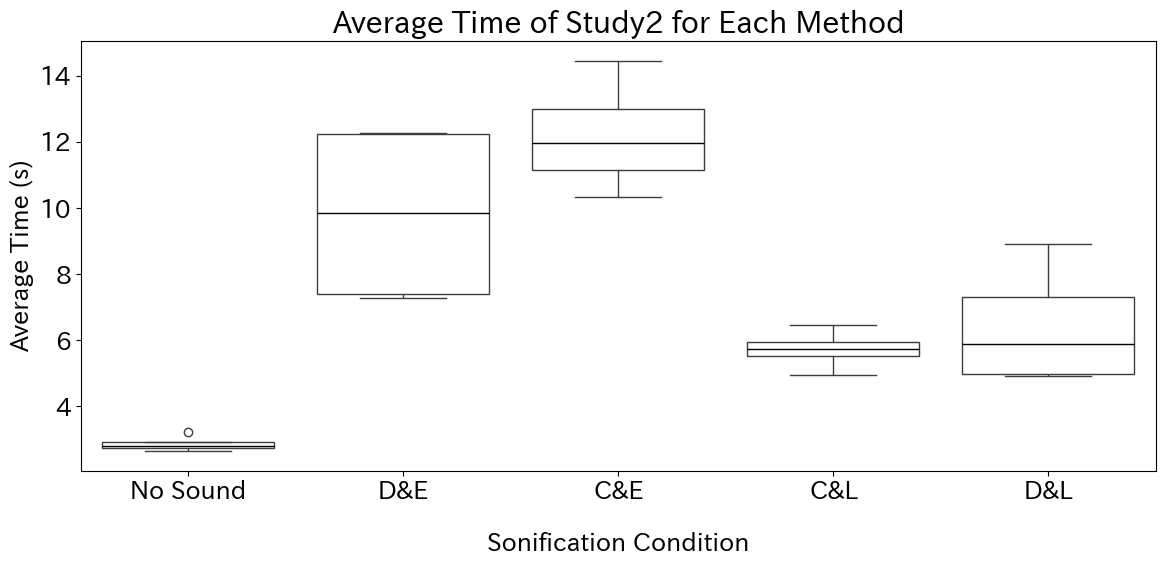

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
# df_all = pd.DataFrame(...)

# Add labels for Method and Place
method_labels = {
    -1: 'No Sound',
    0: 'D&E',
    1: 'C&E',
    2: 'C&L',
    3: 'D&L',
}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Add labels to DataFrame
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# Calculate mean time for each Method_Label
mean_times = df_all.groupby(['Place_Label', 'Method_Label'])['Time'].mean().reset_index()

# Ensure the order is as specified in method_labels
mean_times['Method_Label'] = pd.Categorical(mean_times['Method_Label'], categories=[
    'No Sound',
   'D&E',
   'C&E',
    'C&L',
    'D&L',
], ordered=True)
mean_times = mean_times.sort_values('Method_Label')


# フォントサイズを設定
plt.rcParams.update({'font.size': 18})
# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method_Label', y='Time',hue='Method_Label', data=mean_times, boxprops=dict(facecolor='none'), medianprops=dict(color='black'))
plt.title('Average Time of Study2 for Each Method')
plt.xlabel('Sonification Condition',labelpad=20)
plt.ylabel('Average Time (s)')
# plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('average_measurement_time_by_pointing_method.png', dpi=300)

# Show the plot
plt.show()


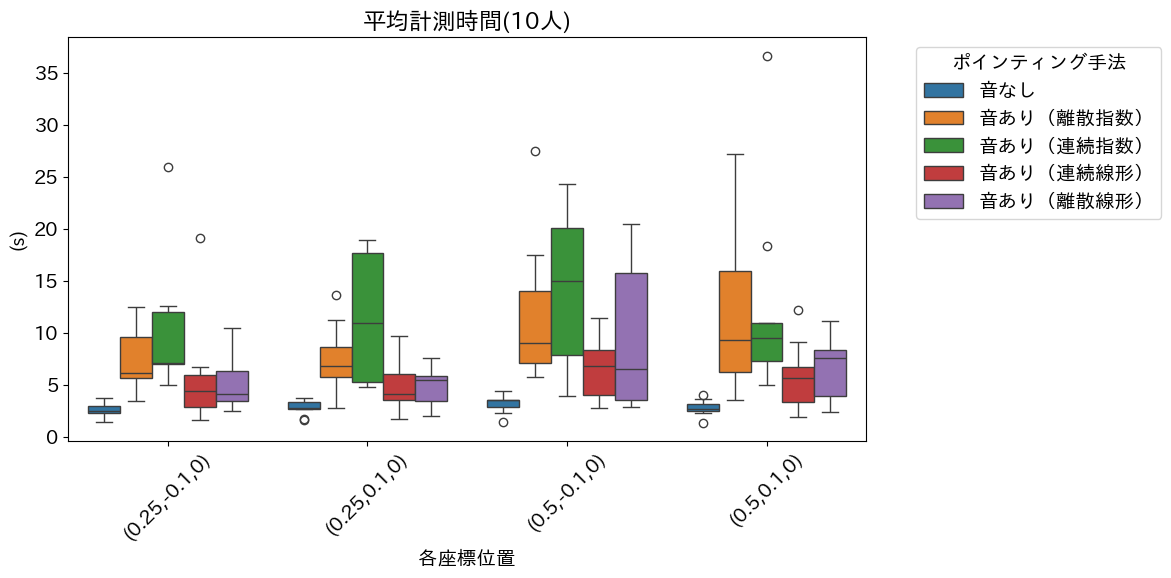

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音なし',
    0: '音あり（離散指数）',
    1: '音あり（連続指数）',
    2: '音あり（連続線形）',
    3: '音あり（離散線形）'

}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Time', hue='Method_Label', data=df_all)
plt.title('平均計測時間(10人)')
plt.xlabel('各座標位置')
plt.ylabel('(s)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
